# VREP Magic Demo - Pioneer Robot

Demonstration using the Pioneer robot:

- use downward facing RGB sensors to follow a line.

In [1]:
#Set up the notebook to work with the V-REP simulator
%run 'Set-up.ipynb'
%run 'Loading scenes.ipynb'

In [9]:
#Load the Pioneer models
%run 'vrep_models/PioneerP3DX.ipynb'

Loading class: PioneerP3DX_base
This is a base class for the PioneerP3DX_base model

Loading class: PioneerP3DX
Methods available in PioneerP3DX:
	move_backward
	move_forward
	rotate_left
	rotate_right
	set_two_motor
	ultrasonic_left_length
	ultrasonic_right_length

Loading class: PioneerP3DXL
Methods available in PioneerP3DXL:
	color_left
	color_right
	move_backward
	move_forward
	rotate_left
	rotate_right
	set_two_motor
	ultrasonic_left_length
	ultrasonic_right_length

The following text widgets are available for display: sensorText1, sensorText2


## Line Follower Example

In [10]:
%vrep_robot_methods PioneerP3DXL

Methods available in PioneerP3DXL:
	color_left
	color_right
	move_backward
	move_forward
	rotate_left
	rotate_right
	set_two_motor
	ultrasonic_left_length
	ultrasonic_right_length


In [4]:
%%vrepsim '../scenes/LineFollowerPioneer.ttt' PioneerP3DXL
# black color      :  43
# white-gray color : -53
import time
while True:
    lclr = robot.color_left()
    rclr = robot.color_right()
    if lclr > 10:
        robot.rotate_left(0.3)
    if rclr > 10:
        robot.rotate_right(0.3)
    if lclr < -20 and rclr < -20:
        robot.move_forward(1.5)
    time.sleep(0.001)

## Widget Demo

The following demo shows how to use a couple of text widgets that are updated from the robot control script.

In [11]:
def line_follow(pioneer):
    import time
    lclr = pioneer.color_left()
    rclr = pioneer.color_right()
    if lclr > 10:
        pioneer.rotate_left(0.3)
    if rclr > 10:
        pioneer.rotate_right(0.3)
    if lclr < -20 and rclr < -20:
        pioneer.move_forward(1.5)
    time.sleep(0.001)

In [12]:
sensorText1.description = 'Left light'
sensorText2.description = 'Max left light'

display(sensorText1,sensorText2)

A Jupyter Widget

A Jupyter Widget

In [13]:
%%vrepsim '../scenes/LineFollowerPioneer.ttt' PioneerP3DXL    
maxval=robot.color_left() 
while True:
    line_follow(robot)
    sensorText1.value =str(robot.color_left())
    maxval =  robot.color_left() if robot.color_left() > maxval else maxval
    sensorText2.value=str(maxval)

## Returning data

In [71]:
%matplotlib inline
import pandas as pd

df=pd.DataFrame(columns=['Time','Left sensor'])

In [72]:
%%vrepsim '../scenes/LineFollowerPioneer.ttt' PioneerP3DXL

#Bring the df variable in the notebook into scope here
#This allows us to modify it here then use it in the notebook when we're done
global df

import time
maxval=robot.color_left()
start_time = time.time()
while True:
    line_follow(robot)
    sensorText.value =str(robot.color_left())
    maxval =  robot.color_left() if robot.color_left() > maxval else maxval
    sensorTextMax.value=str(maxval)
    elapsed_time = time.time() - start_time
    df=pd.concat([df,pd.DataFrame([{'Time':elapsed_time,
                                    'Left sensor':robot.color_left()}])])

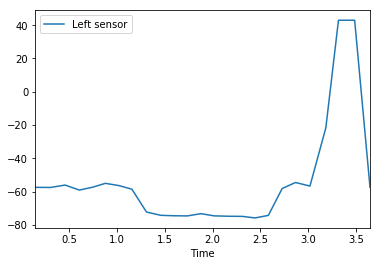

In [73]:
df.plot(x='Time',y='Left sensor');